Text(0, 0.5, 'Population')

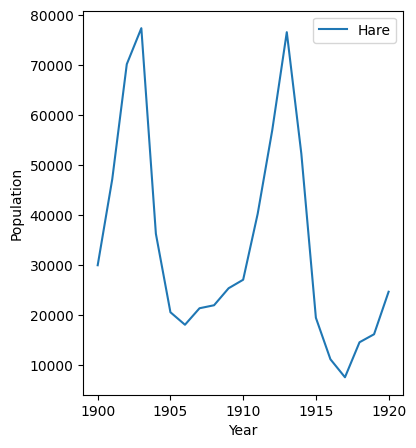

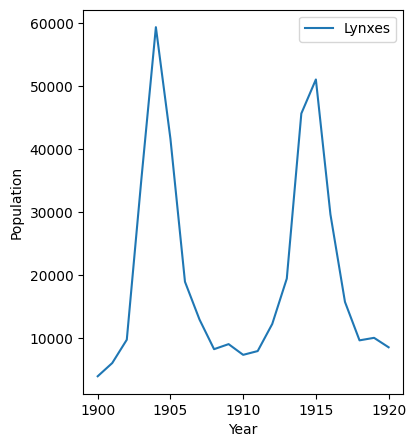

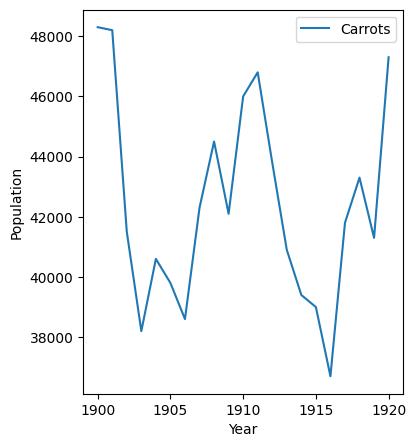

In [2]:
#1 Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')

year, hares, lynxes, carrots = data.T

plt.figure(1)
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, label='Hare')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

plt.figure(2) 
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, lynxes, label = 'Lynxes')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

plt.figure(3)
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, carrots, label = 'Carrots')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

Max. year: 1903.0
Max. year: 1904.0
Max. year: 1900.0


Text(0, 0.5, 'Population')

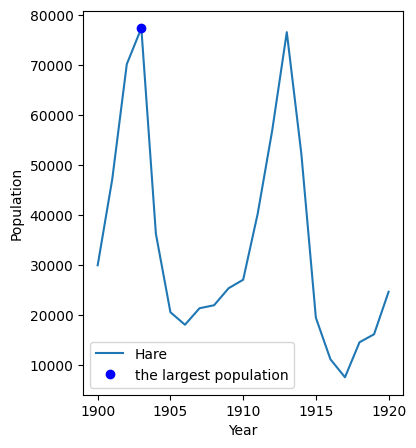

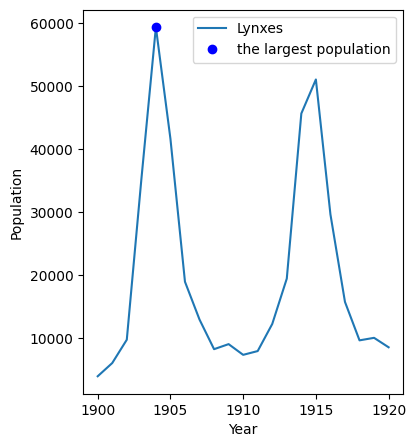

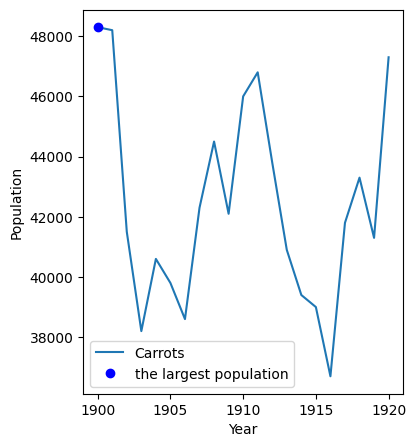

In [3]:
#2 Find which year each species had the largest population. Mark these years in the population plot.

h = np.argmax(hares)
print('Max. year:', year[h])
plt.figure(1)
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, label='Hare')
plt.plot(year[h], hares[h], 'bo', label='the largest population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

h = np.argmax(lynxes)
print('Max. year:', year[h])
plt.figure(2) 
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, lynxes, label = 'Lynxes')
plt.plot(year[h], lynxes[h], 'bo', label='the largest population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

h = np.argmax(carrots)
print('Max. year:', year[h])
plt.figure(3)
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, carrots, label = 'Carrots')
plt.plot(year[h], carrots[h], 'bo', label='the largest population')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')

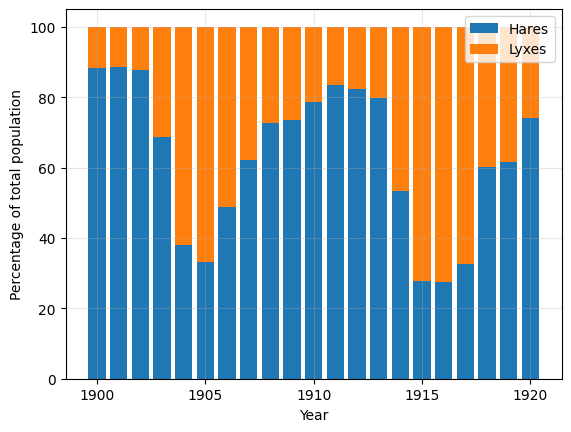

In [4]:
#3 Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

total = hares + lynxes
h_p = hares/total * 100
l_p = lynxes/total * 100

plt.bar(year, h_p, label='Hares')
plt.bar(year, l_p, bottom=h_p, label='Lyxes')
plt.xlabel('Year')
plt.ylabel('Percentage of total population')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

Mean: 34080.95238095238
Std: 20897.906458089667
Mean: 20166.666666666668
Std: 16254.591536908763
Mean: 42400.0
Std: 3322.5062255844787


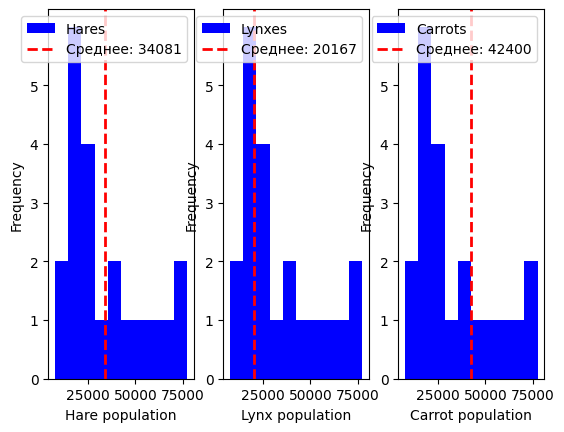

In [5]:
#4 Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

m = np.mean(hares)
s = np.std(hares)
print('Mean:', m)
print('Std:', s)
plt.subplot(1,3,1)
plt.hist(hares, bins=10, label='Hares', color='blue')
plt.axvline(m, color='red', linestyle='--', linewidth=2, label=f'Среднее: {m:.0f}')
plt.xlabel('Hare population')
plt.ylabel('Frequency')
plt.legend()

m = np.mean(lynxes)
s = np.std(lynxes)
print('Mean:', m)
print('Std:', s)
plt.subplot(1,3,2)
plt.hist(hares, bins=10, label='Lynxes', color='blue')
plt.axvline(m, color='red', linestyle='--', linewidth=2, label=f'Среднее: {m:.0f}')
plt.xlabel('Lynx population')
plt.ylabel('Frequency')
plt.legend()

m = np.mean(carrots)
s = np.std(carrots)
print('Mean:', m)
print('Std:', s)
plt.subplot(1,3,3)
plt.hist(hares, bins=10, label='Carrots', color='blue')
plt.axvline(m, color='red', linestyle='--', linewidth=2, label=f'Среднее: {m:.0f}')
plt.xlabel('Carrot population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Max species:
['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


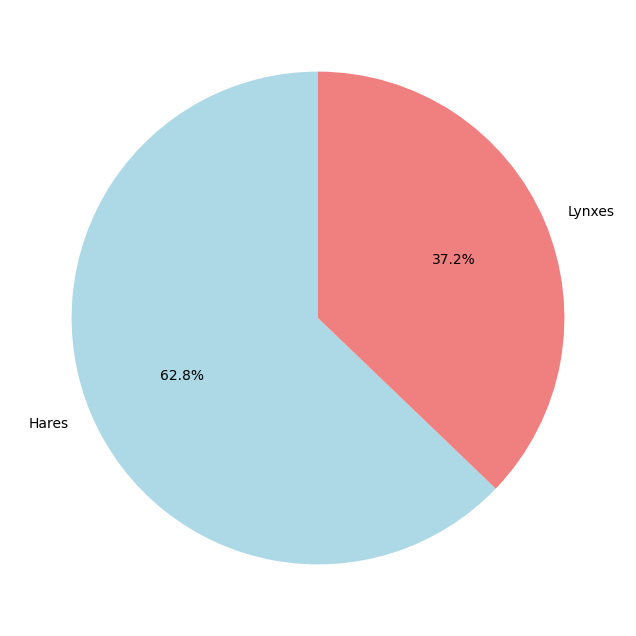

In [6]:
#5 Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

populations = data[:, 1:3]
max_species = np.argmax(populations, axis=1)
species = np.array(['H', 'L'])
print("Max species:")
print(species[max_species])

total_h = np.sum(populations[:, 0])
total_l = np.sum(populations[:, 1])

labels = ['Hares', 'Lynxes']
sizes = [total_h, total_l]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.show()


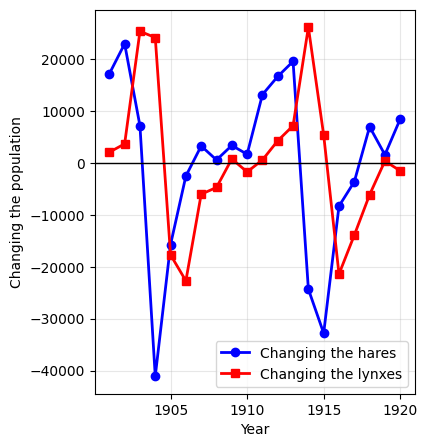


Correlation coefficient between changes in populations:
r = -0.178


In [8]:
#6 Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

hare_c = np.diff(hares)
lynx_c = np.diff(lynxes)
y = year[1:] 

plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(y, hare_c, 'b-', marker='o', label='Changing the hares', linewidth=2)
plt.plot(y, lynx_c, 'r-', marker='s', label='Changing the lynxes', linewidth=2)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Changing the population')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

corr = np.corrcoef(hare_c, lynx_c)[0, 1]
print(f"\nCorrelation coefficient between changes in populations:")
print(f"r = {corr:.3f}")

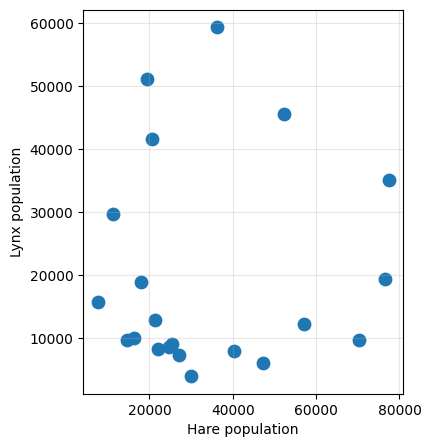

In [9]:
#7 Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.scatter(hares, lynxes, s=80)
plt.xlabel('Hare population')
plt.ylabel('Lynx population')
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
#8 Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

import numpy as np

gap = hares.copy()
idx = np.where(year == 1920)[0][0]
true_val = hares[idx]
gap[idx] = np.nan

print(f"True hare population in 1920: {true_val:.0f}")

median_all = np.nanmedian(gap)
hares_filled = gap.copy()
hares_filled[np.isnan(hares_filled)] = median_all

error_all = abs(median_all - true_val) / true_val * 100
print(f"Median: {median_all:.0f}")
print(f"Estimate for 1920: {median_all:.0f}")
print(f"Error: {error_all:.1f}%")

True hare population in 1920: 24700
Median: 26250
Estimate for 1920: 26250
Error: 6.3%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import confusion_matrix


def kmeans(X, k, max_iter=100, threshold=1e-4):
    N, M = X.shape
    idx = np.random.choice(N, k, replace=False)
    centroids = X[idx].astype(np.float64)
    inertia = np.inf

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        new_inertia = np.sum((X - centroids[labels]) ** 2)

        if abs(inertia - new_inertia) < threshold:
            inertia = new_inertia
            centroids = new_centroids
            break

        centroids = new_centroids
        inertia = new_inertia

    return labels, inertia, centroids


def main():
    print("Loading MNIST dataset...")
    images, labels_true = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    labels_true = labels_true.astype(int)
    images = images / 255.0

    subset_size = 20000
    X = images[:subset_size]
    y_true = labels_true[:subset_size]

    print(f"Running k-means")
    k = 10
    cluster_labels, inertia, centroids = kmeans(X, k=k, max_iter=100, threshold=1e-4)

    print(f"Total squared deviation (inertia): {inertia:.2f}")

    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    for i in range(k):
        center_img = centroids[i].reshape(28, 28)
        axes[i].imshow(center_img, cmap='gray')
        axes[i].set_title(f'Cluster {i}')
        axes[i].axis('off')
    plt.suptitle('Cluster Centers (k=10)')
    plt.tight_layout()
    plt.show()

    cluster_to_digit = {}
    for i in range(k):
        mask = (cluster_labels == i)
        if np.sum(mask) == 0:
            cluster_to_digit[i] = -1
        else:
            true_digits_in_cluster = y_true[mask]
            most_common_digit = np.bincount(true_digits_in_cluster).argmax()
            cluster_to_digit[i] = most_common_digit

    print("\nCluster-to-digit mapping:")
    for cluster, digit in cluster_to_digit.items():
        print(f"Cluster {cluster} → digit {digit}")

    y_pred = np.array([cluster_to_digit[label] for label in cluster_labels])
    valid_mask = y_pred != -1
    y_true_valid = y_true[valid_mask]
    y_pred_valid = y_pred[valid_mask]

    cm = confusion_matrix(y_true_valid, y_pred_valid, labels=range(10))

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix: True vs Predicted Digits')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Digits')
    plt.ylabel('True Digits')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()

Loading MNIST dataset...
Running k-means
